In [25]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn import preprocessing

from numpy import sort
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

In [6]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id='1TmL2AY_yymiV8zXVvmbqXsIZoexR9sLs'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('test_features.csv')

id='1slJiG-M_oawvkzaqWzZkSmVxxZor6mKQ'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('train_features.csv')

train = pd.read_csv('train_features.csv')
test = pd.read_csv('test_features.csv')

In [ ]:
X_train = train.copy()
X_train = X_train.drop(['target', 'id', 'text'], axis=1)

In [ ]:
keyword = list(train['keyword'])
le = preprocessing.LabelEncoder()
keyword_codificada = le.fit_transform(keyword)
X_train['keyword'] = keyword_codificada

location = list(train['location'])
le = preprocessing.LabelEncoder()
location_codificada = le.fit_transform(location)
X_train['location'] = location_codificada

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X_train, train.target, test_size=0.33, random_state=7)

model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

thresholds = sort(model.feature_importances_)
for thresh in thresholds:
	selection = SelectFromModel(model, threshold=thresh, prefit=True)
	select_X_train = selection.transform(x_train)
 
	selection_model = XGBClassifier()
	selection_model.fit(select_X_train, y_train)
	
	select_X_test = selection.transform(x_test)
	y_pred = selection_model.predict(select_X_test)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Accuracy: 70.75%
Thresh=0.006, n=21, Accuracy: 70.75%
Thresh=0.011, n=20, Accuracy: 71.63%
Thresh=0.016, n=19, Accuracy: 71.39%
Thresh=0.018, n=18, Accuracy: 71.43%
Thresh=0.023, n=17, Accuracy: 71.31%
Thresh=0.027, n=16, Accuracy: 71.59%
Thresh=0.028, n=15, Accuracy: 71.71%
Thresh=0.031, n=14, Accuracy: 71.51%
Thresh=0.033, n=13, Accuracy: 71.35%
Thresh=0.034, n=12, Accuracy: 71.03%
Thresh=0.038, n=11, Accuracy: 71.03%
Thresh=0.038, n=10, Accuracy: 70.51%
Thresh=0.040, n=9, Accuracy: 70.79%
Thresh=0.043, n=8, Accuracy: 71.19%
Thresh=0.045, n=7, Accuracy: 68.36%
Thresh=0.046, n=6, Accuracy: 68.21%
Thresh=0.048, n=5, Accuracy: 67.45%
Thresh=0.058, n=4, Accuracy: 66.53%
Thresh=0.084, n=3, Accuracy: 65.38%
Thresh=0.098, n=2, Accuracy: 63.43%
Thresh=0.234, n=1, Accuracy: 63.19%


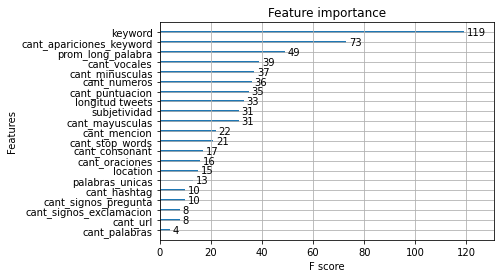

In [26]:
selection = SelectFromModel(model, threshold=0.040, prefit=True)
selected_dataset = selection.transform(x_train)
xgb.plot_importance(booster=model)
plt.show()

Elegimos: 'keyword', 'prom_long_palabra', 'cant_puntuacion', 'cant_apariciones_keyword', 'cant_minusculas', 'cant_vocales'